<a href="https://colab.research.google.com/github/ashwinb007/Play-Store-App-Review-Analysis/blob/main/Team_Notebook_Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Play Store App Review Analysis



**Project Type**    - EDA
##### **Contribution**    - Team
##### **Team Member 1 -** Ashwin Babu
##### **Team Member 2 -** Amar Singh Chouhan
##### **Team Member 3 -** Hitesh Malvi
##### **Team Member 4 -** Ninad Rathod
##### **Team Member 5 -** Vikas Chandra

# **Project Summary -**

**PlayStore**

*Play Store and formerly Android Market, is a digital distribution service operated and developed by Google. It has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.*

**Data**

*In this notebook, we will do a comprehensive analysis of the Android app market and users review by comparing over ten thousand apps and reveiws repectively in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.*

*Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.*

*Also, we will explore and analyze the data to discover key factors responsible for app engagement and success.*



# **GitHub Link -**

https://github.com/ashwinb007/Play-Store-App-Review-Analysis

# Importing libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
%matplotlib inline
import seaborn as sns 

import plotly  
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.express as px

# for visualization google colab
import plotly.io as iplot
iplot.renderers.default = 'colab'

# Mounting drive and importing data

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
play_store = pd.read_csv('/content/drive/MyDrive/Copy of Play Store Data.csv')
user_review = pd.read_csv('/content/drive/MyDrive/Copy of User Reviews.csv')

In [ ]:
play_store

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
user_review

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


# Analysing the Dataset

## PlayStore Analysis

In [ ]:
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
play_store.shape

(10841, 13)

In [ ]:
play_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
play_store.describe(include = 'all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
play_store.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

## User Review Anaylsis


In [ ]:
user_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
user_review.shape

(64295, 5)

In [ ]:
user_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
user_review.describe(include = 'all')

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,64295,37427,37432,37432.000000,37432.000000
unique,1074,27994,3,NaN,NaN
top,Angry Birds Classic,Good,Positive,NaN,NaN
freq,320,247,23998,NaN,NaN
mean,NaN,NaN,NaN,0.182146,0.492704
std,NaN,NaN,NaN,0.351301,0.259949
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.357143
50%,NaN,NaN,NaN,0.150000,0.514286
75%,NaN,NaN,NaN,0.400000,0.650000


In [ ]:
user_review.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

# Cleaning the dataset

## Duplicate Data

In [ ]:
#Copying the database for comparison after cleaning the data
play_store_original = play_store.copy()
play_store_original.shape

(10840, 13)

In [ ]:
#Let's only keep the unique data and remove the duplicate data from the app in column.
play_store.drop_duplicates(subset= 'App', inplace=True)
print(f'The number of rows and columns in playstore before is {play_store_original.shape} and \n after cleaning the data by removing duplicates is{play_store.shape}')

The number of rows and columns in playstore before is (10840, 13) and 
 after cleaning the data by removing duplicates is(9659, 13)


## Conversion of columns for analysing dataset

In [ ]:
#As some of the values are non-numerical value so let's convert the categorical variables the into numerical.
play_store['Size'].unique()

array([1.90e+01, 1.40e+01, 8.70e+00, 2.50e+01, 2.80e+00, 5.60e+00,
       2.90e+01, 3.30e+01, 3.10e+00, 2.80e+01, 1.20e+01, 2.00e+01,
       2.10e+01, 3.70e+01, 2.70e+00, 5.50e+00, 1.70e+01, 3.90e+01,
       3.10e+01, 4.20e+00, 7.00e+00, 2.30e+01, 6.00e+00, 6.10e+00,
       4.60e+00, 9.20e+00, 5.20e+00, 1.10e+01, 2.40e+01,      nan,
       9.40e+00, 1.50e+01, 1.00e+01, 1.20e+00, 2.60e+01, 8.00e+00,
       7.90e+00, 5.60e+01, 5.70e+01, 3.50e+01, 5.40e+01, 2.01e-01,
       3.60e+00, 5.70e+00, 8.60e+00, 2.40e+00, 2.70e+01, 2.50e+00,
       1.60e+01, 3.40e+00, 8.90e+00, 3.90e+00, 2.90e+00, 3.80e+01,
       3.20e+01, 5.40e+00, 1.80e+01, 1.10e+00, 2.20e+00, 4.50e+00,
       9.80e+00, 5.20e+01, 9.00e+00, 6.70e+00, 3.00e+01, 2.60e+00,
       7.10e+00, 3.70e+00, 2.20e+01, 7.40e+00, 6.40e+00, 3.20e+00,
       8.20e+00, 9.90e+00, 4.90e+00, 9.50e+00, 5.00e+00, 5.90e+00,
       1.30e+01, 7.30e+01, 6.80e+00, 3.50e+00, 4.00e+00, 2.30e+00,
       7.20e+00, 2.10e+00, 4.20e+01, 7.30e+00, 9.10e+00, 5.50e

In [ ]:
play_store['Size'] = play_store['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
play_store['Size'] = play_store['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
play_store['Size'] = play_store['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
play_store['Size'] = play_store['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

In [ ]:
play_store['Size'].unique()

array([1.90e+01, 1.40e+01, 8.70e+00, 2.50e+01, 2.80e+00, 5.60e+00,
       2.90e+01, 3.30e+01, 3.10e+00, 2.80e+01, 1.20e+01, 2.00e+01,
       2.10e+01, 3.70e+01, 2.70e+00, 5.50e+00, 1.70e+01, 3.90e+01,
       3.10e+01, 4.20e+00, 7.00e+00, 2.30e+01, 6.00e+00, 6.10e+00,
       4.60e+00, 9.20e+00, 5.20e+00, 1.10e+01, 2.40e+01,      nan,
       9.40e+00, 1.50e+01, 1.00e+01, 1.20e+00, 2.60e+01, 8.00e+00,
       7.90e+00, 5.60e+01, 5.70e+01, 3.50e+01, 5.40e+01, 2.01e-01,
       3.60e+00, 5.70e+00, 8.60e+00, 2.40e+00, 2.70e+01, 2.50e+00,
       1.60e+01, 3.40e+00, 8.90e+00, 3.90e+00, 2.90e+00, 3.80e+01,
       3.20e+01, 5.40e+00, 1.80e+01, 1.10e+00, 2.20e+00, 4.50e+00,
       9.80e+00, 5.20e+01, 9.00e+00, 6.70e+00, 3.00e+01, 2.60e+00,
       7.10e+00, 3.70e+00, 2.20e+01, 7.40e+00, 6.40e+00, 3.20e+00,
       8.20e+00, 9.90e+00, 4.90e+00, 9.50e+00, 5.00e+00, 5.90e+00,
       1.30e+01, 7.30e+01, 6.80e+00, 3.50e+00, 4.00e+00, 2.30e+00,
       7.20e+00, 2.10e+00, 4.20e+01, 7.30e+00, 9.10e+00, 5.50e

In [ ]:
play_store['Installs'].unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02,
       1.e+01, 1.e+00, 5.e+00, 0.e+00])

In [ ]:
play_store = play_store[~(play_store['Installs'] == "Free")].reset_index(drop=True)

In [ ]:
play_store['Installs'] = play_store['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
play_store['Installs'] = play_store['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
play_store['Installs'] = play_store['Installs'].apply(lambda x: int(x))

In [ ]:
play_store['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [ ]:
play_store['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [ ]:
play_store['Price'] = play_store['Price'].apply(lambda x: x.replace('$', '') if '$' in str(x) else x)

In [ ]:
play_store['Size'] = play_store['Size'].apply(lambda x: float(x))
play_store['Installs'] = play_store['Installs'].apply(lambda x: float(x))
play_store['Price'] = play_store['Price'].apply(lambda x: float(x))
play_store['Reviews'] = play_store['Reviews'].apply(lambda x: int(x))

In [ ]:
play_store.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

## Null values

In [ ]:
## Let's get the ratio of missing values for each feature
play_store_na = (play_store.isnull().sum() / len(play_store)) * 100
play_store_na = play_store_na.drop(play_store_na[play_store_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :play_store_na})
missing_data

,Missing Ratio
Rating,15.146495
Size,12.703178
Current Ver,0.082824
Android Ver,0.020706
Type,0.010353


In [ ]:
## Drop the Null values in Rating column
play_store.dropna(subset =['Rating'], inplace = True)
print("The number of rows and columns in play_store_df after dropping the NAs from 'Rating' is",play_store.shape)

The number of rows and columns in play_store_df after dropping the NAs from 'Rating' is (8196, 13)


In [ ]:
## Recalculate the missing value ratio
play_store_na = (play_store.isnull().sum() / len(play_store)) * 100
play_store_na = play_store_na.drop(play_store_na[play_store_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :play_store_na})
missing_data

,Missing Ratio
Size,14.263055
Current Ver,0.048804
Android Ver,0.024402


*Since the ratio of missing values for the rest of the columns is less (<0.05), we proceed to fill these with the mode values instead of dropping these rows.*

In [ ]:
## Fill the three columns with the mode value
play_store['Current Ver'] = play_store['Current Ver'].fillna(play_store['Current Ver'].mode()[0])
play_store['Android Ver'] = play_store['Android Ver'].fillna(play_store['Android Ver'].mode()[0])
play_store['Content Rating'] = play_store['Content Rating'].fillna(play_store['Content Rating'].mode()[0])

# **Exploratry Data Analysis(EDA)**

## Top 5 apps of free type by size.

In [ ]:
free_apps = play_store[play_store['Type'] == 'Free']

In [ ]:
top_free_apps = free_apps[free_apps['Size'] == free_apps['Size'].max()]
t5free_apps=top_free_apps.nlargest(5,'Size')
t5free_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1080,Post Bank,FINANCE,4.5,60449,100.0,1000000.0,Free,0.0,Everyone,Finance,"July 23, 2018",2.9.12,4.0 and up
1565,Talking Babsy Baby: Baby Games,LIFESTYLE,4.0,140995,100.0,10000000.0,Free,0.0,Everyone,Lifestyle;Pretend Play,"July 16, 2018",9.0,4.0 and up
1758,Hungry Shark Evolution,GAME,4.5,6074334,100.0,100000000.0,Free,0.0,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up
1793,Mini Golf King - Multiplayer Game,GAME,4.5,531458,100.0,5000000.0,Free,0.0,Everyone,Sports,"July 20, 2018",3.04.1,4.0.3 and up
1988,Hungry Shark Evolution,GAME,4.5,6074627,100.0,100000000.0,Free,0.0,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up


## Content rating by different ages

In [ ]:
content_rating_df = play_store['Content Rating'].value_counts()
print(content_rating_df)

Everyone           6618
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64


In [ ]:
content_rating_df = [go.Histogram(
        x = play_store['Content Rating'],
        xbins = {'start': 0.5, 'size': 1, 'end' :6})]
 
plotly.offline.iplot(content_rating_df, filename='Rating')

## Top Content Rating in teen of paid and free type app.

In [ ]:
paid_play_store=play_store[play_store['Content Rating']=='Teen']

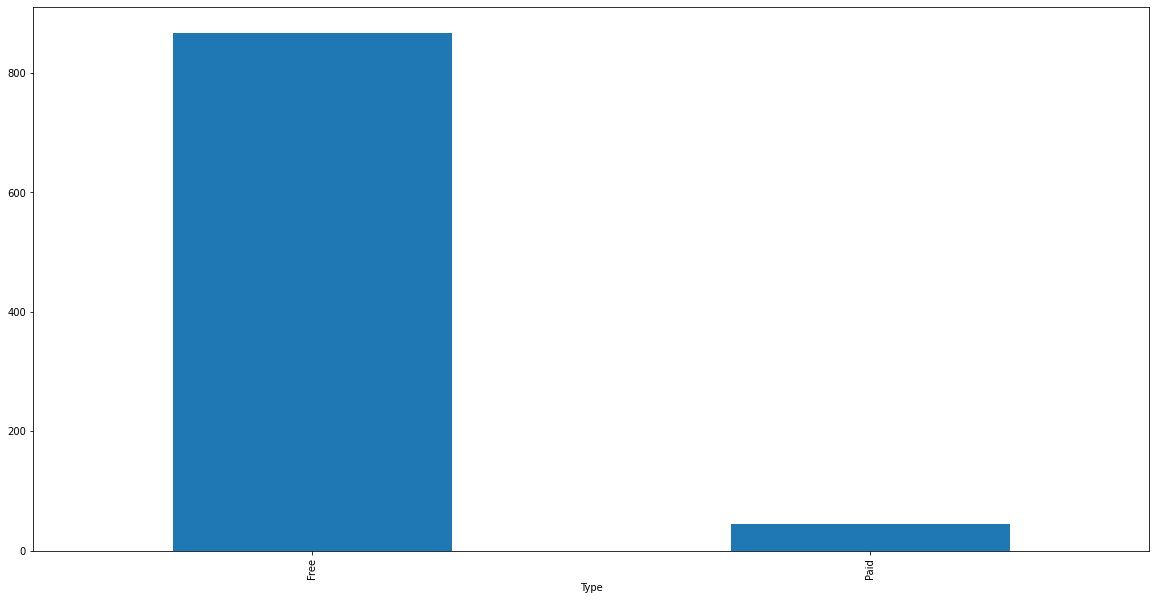

In [ ]:
paid_play_store.groupby('Type')['App'].count().sort_values(ascending= False).plot.bar(figsize = (20,10))

## Highest number of rating

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



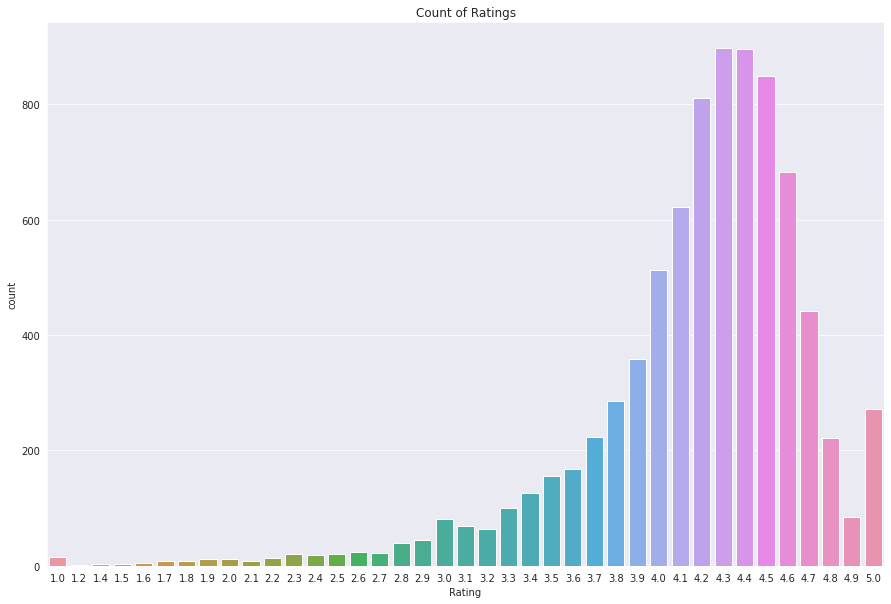

In [ ]:
Dor_graph = sns.countplot(play_store['Rating'])
plt.rcParams['figure.figsize'] = (20, 10)
plt.title('Count of Ratings')
plt.show()

In [ ]:
play_store.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

## Content Rating v/s rating

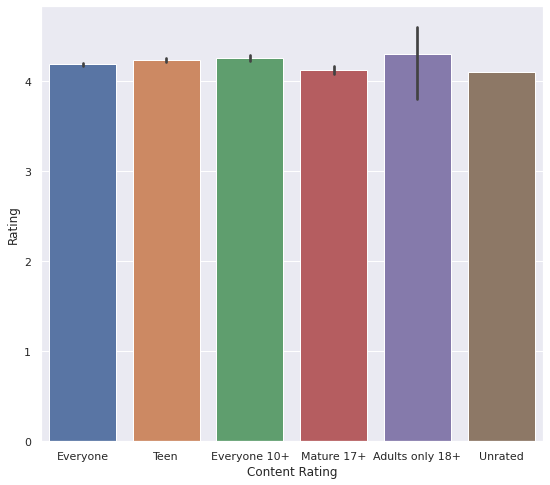

In [ ]:
sns.barplot(x=play_store["Content Rating"], y=play_store["Rating"])
sns.set(rc={'figure.figsize':(9,6)})

## Average Rate Distribution & app rating with different category
   

In [ ]:
## general distribution of rating
rating_distribution = [go.Histogram(
        x = play_store.Rating,
        xbins = {'start': 1, 'size': 0.1, 'end' :5})]

print('Average app rating = ', np.mean(play_store['Rating']))
plotly.offline.iplot(rating_distribution, filename='overall_rating_distribution')

Average app rating =  4.173243045387993


[Text(0, 0, 'BUSINESS'),
 Text(0, 0, 'COMMUNICATION'),
 Text(0, 0, 'FINANCE'),
 Text(0, 0, 'HEALTH_AND_FITNESS'),
 Text(0, 0, 'LIFESTYLE'),
 Text(0, 0, 'GAME'),
 Text(0, 0, 'FAMILY'),
 Text(0, 0, 'MEDICAL'),
 Text(0, 0, 'SOCIAL'),
 Text(0, 0, 'SHOPPING'),
 Text(0, 0, 'PHOTOGRAPHY'),
 Text(0, 0, 'SPORTS'),
 Text(0, 0, 'TRAVEL_AND_LOCAL'),
 Text(0, 0, 'TOOLS'),
 Text(0, 0, 'PERSONALIZATION'),
 Text(0, 0, 'PRODUCTIVITY'),
 Text(0, 0, 'NEWS_AND_MAGAZINES')]

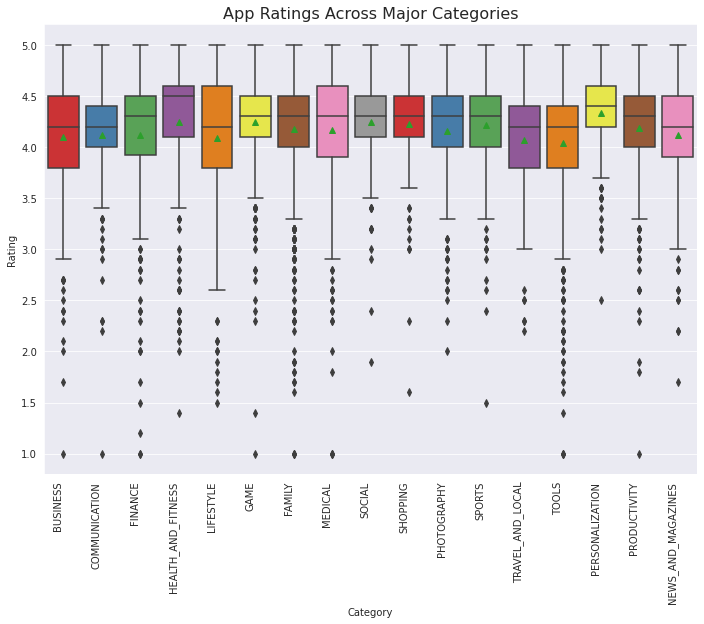

In [ ]:
topcat = play_store.groupby('Category').filter(lambda x: len(x) >= 170).reset_index()
topcat.head()
sns.set_style("darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.title("App Ratings Across Major Categories", fontsize=16)
ax = sns.boxplot(x='Category', y='Rating', data=topcat, palette='Set1', showmeans=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")


## Revenue generated by Top Categories

In [ ]:
#Revenue = Price * Installs
play_store['Revenue'] = play_store['Price'] * play_store['Installs']

In [ ]:
play_store.sort_values(by="Revenue",ascending=False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
1743,Minecraft,FAMILY,4.5,2376564,NaN,10000000.0,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,69900000.0
4396,I am rich,LIFESTYLE,3.8,3547,1.8,100000.0,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up,39999000.0
4400,I Am Rich Premium,FINANCE,4.1,1867,4.7,50000.0,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up,19999500.0
3208,Hitman Sniper,GAME,4.6,408292,29.0,10000000.0,Paid,0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,9900000.0
6370,Grand Theft Auto: San Andreas,GAME,4.4,348962,26.0,1000000.0,Paid,6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up,6990000.0


In [ ]:
play_store[["App","Revenue","Category"]]

,App,Revenue,Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,0.0,ART_AND_DESIGN
1,Coloring book moana,0.0,ART_AND_DESIGN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0.0,ART_AND_DESIGN
3,Sketch - Draw & Paint,0.0,ART_AND_DESIGN
4,Pixel Draw - Number Art Coloring Book,0.0,ART_AND_DESIGN
...,...,...,...
9652,FR Calculator,0.0,FAMILY
9654,Sya9a Maroc - FR,0.0,FAMILY
9655,Fr. Mike Schmitz Audio Teachings,0.0,FAMILY
9657,The SCP Foundation DB fr nn5n,0.0,BOOKS_AND_REFERENCE


In [ ]:
revenue_category = play_store.groupby("Category",as_index=False)["Revenue"].sum().sort_values(by="Revenue",ascending=False).head(15)
revenue_category

,Category,Revenue
11,FAMILY,1.136738e+08
18,LIFESTYLE,5.758394e+07
14,GAME,4.068784e+07
12,FINANCE,2.572664e+07
24,PHOTOGRAPHY,8.546050e+06
23,PERSONALIZATION,6.796310e+06
20,MEDICAL,5.872355e+06
29,TOOLS,5.462910e+06
28,SPORTS,4.706154e+06
25,PRODUCTIVITY,4.304452e+06


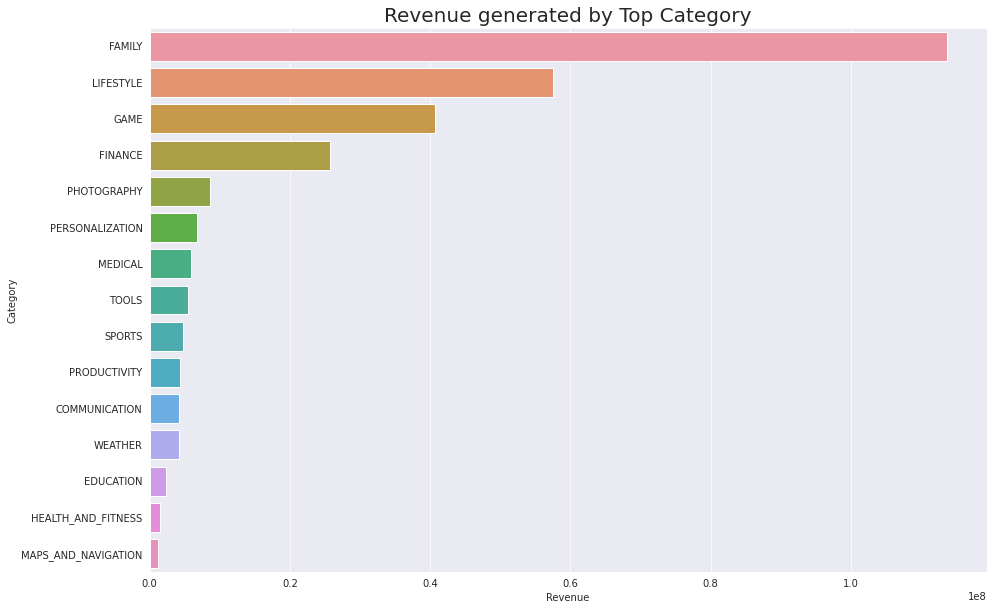

In [ ]:
sns.barplot(x=revenue_category["Revenue"],y=revenue_category["Category"],data=revenue_category)
plt.title("Revenue generated by Top Category",fontsize=20)
plt.show()

## Average sentiment 

In [ ]:
user_review_df = user_review['Sentiment'].value_counts()
user_review_df

Positive    23998
Negative     8271
Neutral      5163
Name: Sentiment, dtype: int64

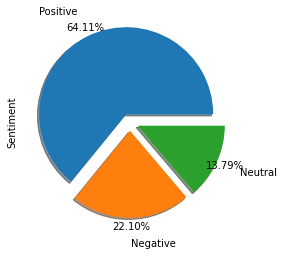

In [ ]:
user_review['Sentiment'].value_counts().plot(kind='pie', explode= (0.1,0.1,0.1),shadow=True,autopct='%1.2f%%', pctdistance=1.1, labeldistance=1.3)

## Compare the age and sentiments

In [ ]:
 # now we will merge both data for more analysis.
merge_df = play_store.merge(user_review, on="App")
merge_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0,I love colors inspyering,Positive,0.500,0.600000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



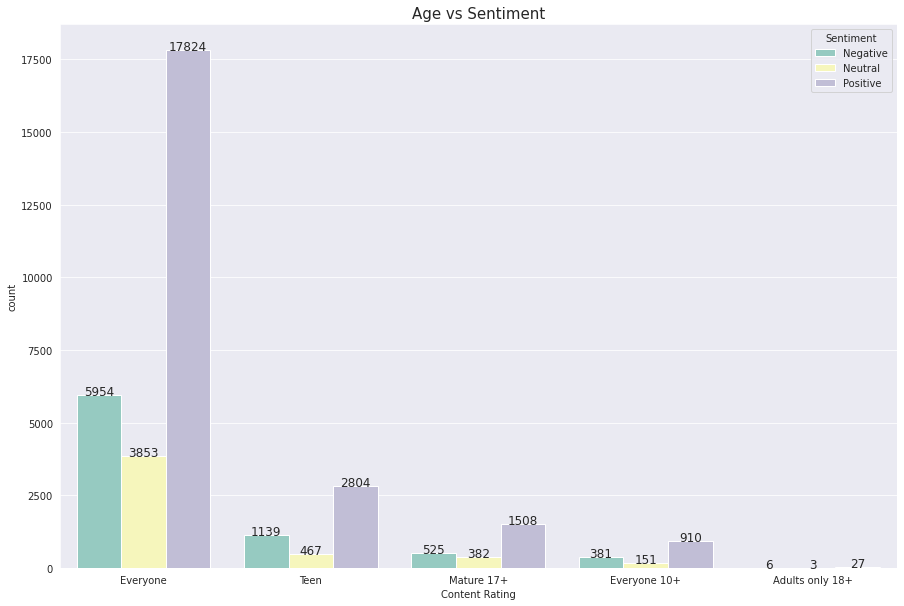

In [ ]:
avs = sns.countplot(merge_df["Content Rating"],hue=merge_df['Sentiment'],palette="Set3")
plt.title("Age vs Sentiment",size=15)
for p in avs.patches:
    avs.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12)
plt.show()

## Corelation of both the data set

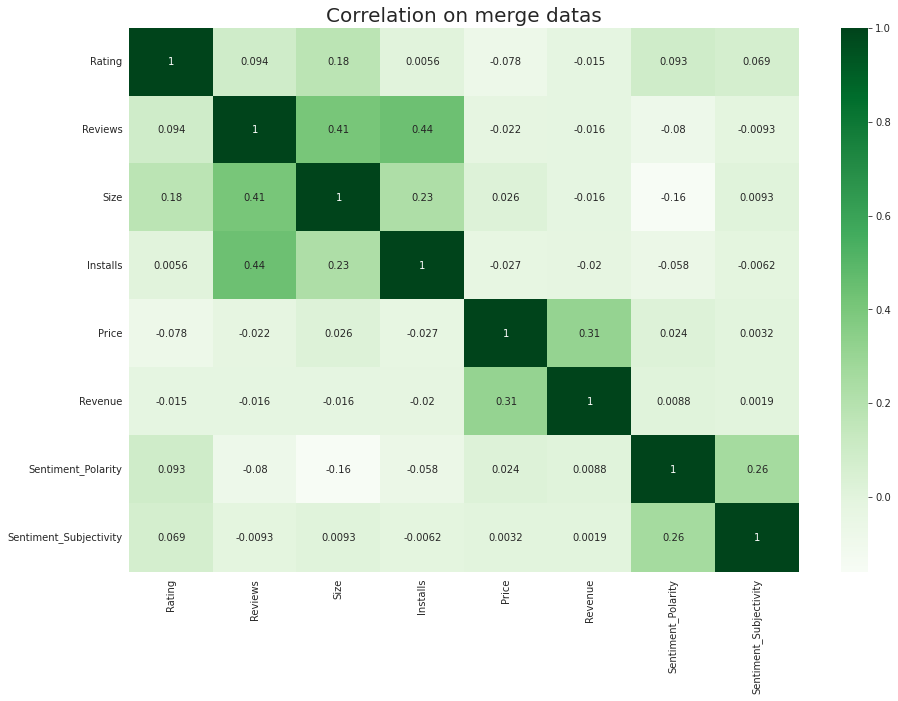

In [ ]:
sns.heatmap(merge_df.corr(),annot = True,cmap='Greens')
plt.title("Correlation on merge datas",fontsize=20)
plt.show()

## paid apps v/s free apps

In [ ]:
play_store_df = play_store['Type'].value_counts()
play_store_df

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

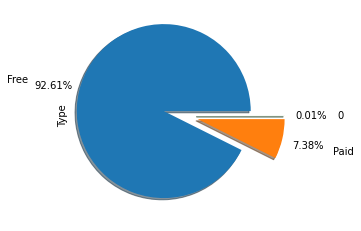

In [ ]:
play_store['Type'].value_counts().plot(kind='pie', explode= (0.2,0.2,0.2), shadow=True,autopct='%1.2f%%', pctdistance=1.3, labeldistance=1.6)

## **Conclusion**

*  Top free app by size is POST BANK of Finance category.
*  TEEN contains the most values in the content rating with the total number of 912 values.
*  Most of the content rating given by teen is for the free apps that is something around 850.
* Most of the apps ratings are between 4.2 and 4.6. Maximum numbers of apps rated is 4.3 followed by 4.4
* Every Category under Content Rating is getting rating of 4+ which is good.
* Average rating of apps on Google Play Store is {4.17}
*  The Health and Fitness and Books and Reference produce the best apps with 50% apps having a rating greater than 4.5. Interestingly, half of the Dating apps have a rating lower than the average.
*  The Category who generated the highest revenue is 'Family' followed by 'Lifestyle' and 'Game'.
*  More than 50% of the total sentiments are positive in the dataset user review.
*  That most sentiments are from 'everyone'(20028) which is positive.
* 92.61% of the apps are free in the PlayStore app.